# Part II - (Prosper Loan Data Exploration)
## by (Alfred BobManuel )


## Investigation Overview



In this investigation, I wanted to look at the attributes of loans that could be used to predict their borrower APR. The main focus was on the Borrowers Apr, EmploymentStatus, Borrower's Prosper rating, LoanTerm, LoanOriginalAmount, StatedMonthly Income. 


## Dataset Overview

> the dataset contains 113,937 rows and 81 columns that depict issued loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income etc. this data will be analyzed visually to generate insight 

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
prosper = pd.read_csv('prosperLoanData.csv')
prosper.head()

new_prosper= prosper.copy()
new_loan = new_prosper.loc [:,['Term','ListingCreationDate','ClosedDate','BorrowerAPR','BorrowerRate','LenderYield',
                               'ProsperRating (Alpha)','ProsperScore','IncomeRange','ListingCategory (numeric)','BorrowerState','Occupation',
                               'EmploymentStatus','AmountDelinquent','StatedMonthlyIncome','LoanCurrentDaysDelinquent',
                               'LoanOriginalAmount','LoanOriginationDate','MonthlyLoanPayment','LP_ServiceFees','Investors','LoanStatus', 'IsBorrowerHomeowner','ProsperRating (numeric)']].copy()
new_loan.head()

,Term,ListingCreationDate,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,ProsperRating (Alpha),ProsperScore,IncomeRange,ListingCategory (numeric),...,StatedMonthlyIncome,LoanCurrentDaysDelinquent,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment,LP_ServiceFees,Investors,LoanStatus,IsBorrowerHomeowner,ProsperRating (numeric)
0,36,2007-08-26 19:09:29.263000000,2009-08-14 00:00:00,0.16516,0.1580,0.1380,NaN,NaN,"$25,000-49,999",0,...,3083.333333,0,9425,2007-09-12 00:00:00,330.43,-133.18,258,Completed,True,NaN
1,36,2014-02-27 08:28:07.900000000,NaN,0.12016,0.0920,0.0820,A,7.0,"$50,000-74,999",2,...,6125.000000,0,10000,2014-03-03 00:00:00,318.93,0.00,1,Current,False,6.0
2,36,2007-01-05 15:00:47.090000000,2009-12-17 00:00:00,0.28269,0.2750,0.2400,NaN,NaN,Not displayed,0,...,2083.333333,0,3001,2007-01-17 00:00:00,123.32,-24.20,41,Completed,False,NaN
3,36,2012-10-22 11:02:35.010000000,NaN,0.12528,0.0974,0.0874,A,9.0,"$25,000-49,999",16,...,2875.000000,0,10000,2012-11-01 00:00:00,321.45,-108.01,158,Current,True,6.0
4,36,2013-09-14 18:38:39.097000000,NaN,0.24614,0.2085,0.1985,D,4.0,"$100,000+",2,...,9583.333333,0,15000,2013-09-20 00:00:00,563.97,-60.27,20,Current,True,3.0


## Prosper Score Distribution

According to the google sheet description of the prosper score it sets a risk score range from 1-10, and with the above visual its slightly normal distributed but 4, 6 and 8 appear to be the most frequent amongst the range of values.


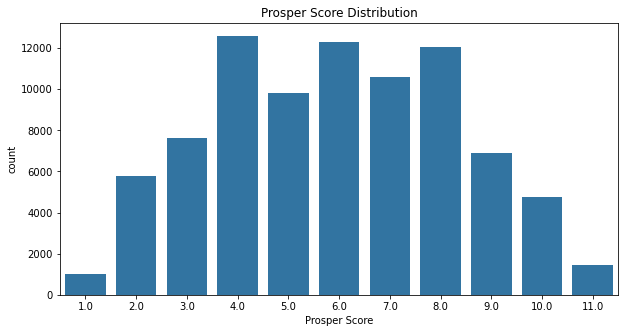

In [3]:
base_color = sb.color_palette()[0]
plt.figure(figsize=[10, 5])
sb.countplot(data=new_loan, x= 'ProsperScore', color=base_color)
plt.title('Prosper Score Distribution')
plt.xlabel('Prosper Score');

## Borrower State Distribution

California, Texas and New York has the three biggest amount of loan.

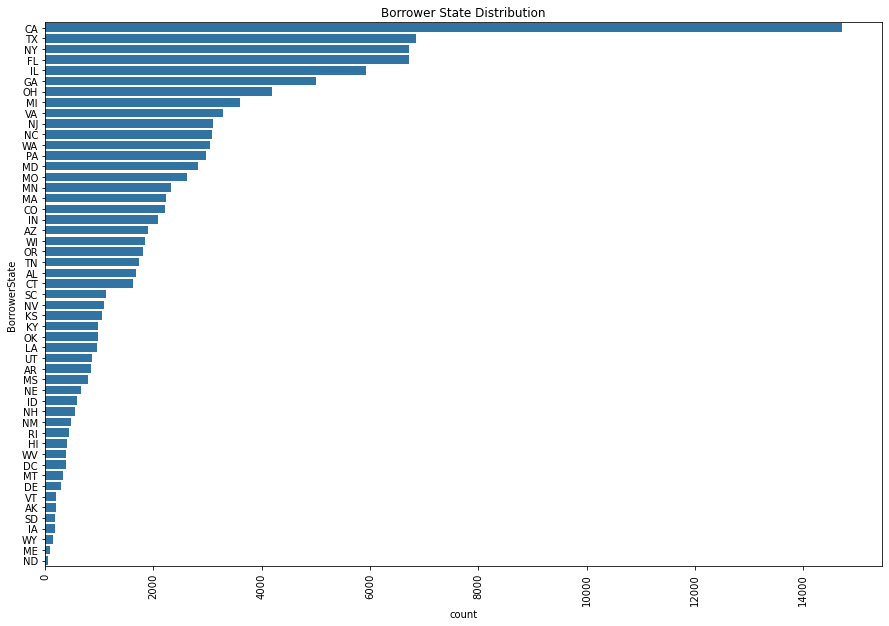

In [4]:
ordered_cat = new_loan['BorrowerState'].value_counts().index
plt.figure(figsize=[15, 10])
sb.countplot(data=new_loan,y='BorrowerState',color=base_color, order=ordered_cat);
plt.title('Borrower State Distribution');
plt.xticks(rotation=90);

## BorrowerApr vs Loan Status
the current and completed loans have lower rate and mean than the Past_due loans except for the Past-due (16-30days) cancelled, Although at that point the difference is very little.

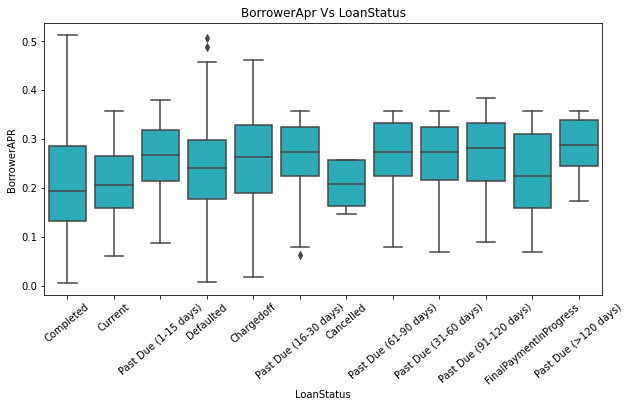

In [5]:
color = sb.color_palette()[9]
plt.figure(figsize = (10,5))
sb.boxplot(x ='LoanStatus', y= 'BorrowerAPR',  data = new_loan, color = color);
plt.title('BorrowerApr Vs LoanStatus')
plt.xticks(rotation = 40);

## Borrowers Home vs EmploymentStatus

the majority of the employed people have houses but people who fall under the category of full time have equal number of houses as people who dont, although i expected employed persons to have houses cause most times they take loan for mortgage but at the end numbers dont lie.

Text(0.5, 1.0, 'Borrowers Home vs EmploymentStatus')

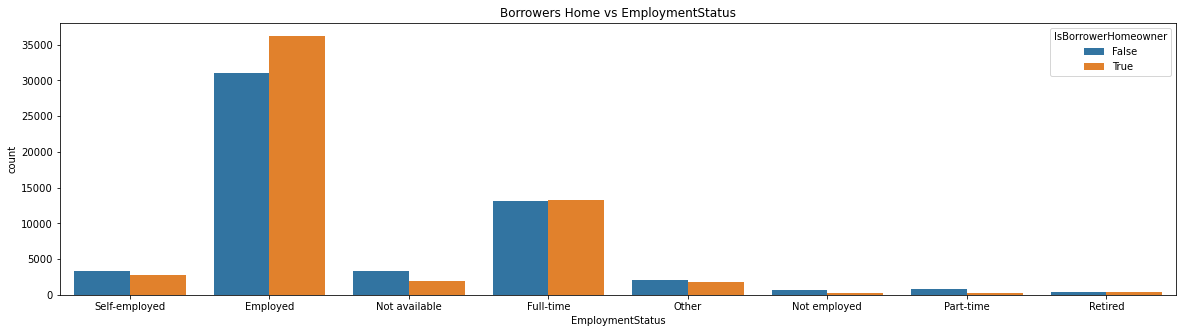

In [6]:
plt.figure(figsize=[20,5])
sb.countplot (data = new_loan, x = "EmploymentStatus" , hue ="IsBorrowerHomeowner");
plt.title('Borrowers Home vs EmploymentStatus')

## Borrower Rate and Loan Term split by ProsperRating(Alpha)

usually short term loans would have higher rate and this goes for even creating an amortization table as well because with long rate the interest is compounded which in turn leads to a huge amount exponentially but wouldnt necessarily hurt so much to most people since its a very long time to pay up, there is usally small range of values spanned over a long time, that is when the loan term is long. but in this case i am seeing a lower rate for the short Term.

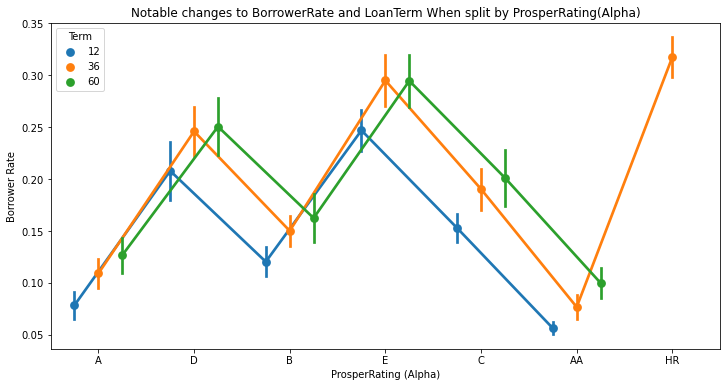

In [7]:
plt.figure(figsize=[12,6])

sb.pointplot(x ='ProsperRating (Alpha)', y ='BorrowerRate', hue = 'Term', data = new_loan, palette = 'tab10', linestyle ='', 
             dodge = 0.5, ci ='sd')
plt.title('Notable changes to BorrowerRate and LoanTerm When split by ProsperRating(Alpha)')
plt.ylabel('Borrower Rate');

## Effect of LoanTerm on BorrowerApr and LoanAmount

It is interesting to note that Term does not have a significant effect on the relationship of BorrowerApr and LoanAmount


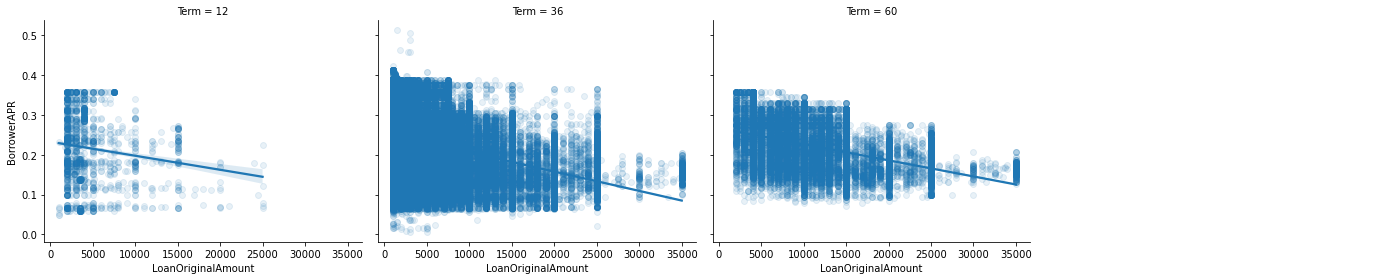

In [8]:
g=sb.FacetGrid(data=new_loan, aspect=1.2, height=4, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.03, scatter_kws={'alpha':0.1});
g.add_legend();